In [1]:
import numpy as np
import pandas as pd
# library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Loading Toronto Data

In [2]:
toronto_ll_df = pd.read_csv('toronto.csv')
toronto_ll_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


## Loading Toronto Census Data

In [3]:
toronto_census_df = pd.read_csv('toronto_census.csv') # load the census data
toronto_census_df.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


#### Checking for NULL values

In [4]:
print("NULL VALUES IN TORONTO DATA: ", toronto_census_df.isnull().sum().sum())
print("NULL VALUES IN CENSUS DATA: ", toronto_ll_df.isnull().sum().sum())

NULL VALUES IN TORONTO DATA:  0
NULL VALUES IN CENSUS DATA:  0


In [5]:
toronto_census_df.columns

Index(['PostalCode', 'Borough', 'Neighbourhood Number', 'Population, 2016',
       'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups in 2015 ', '  Under $5,000',
       '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999',
       '  $20,000 to $24,999', '  $25,000 to $29,999', '  $30,000 to $34,999',
       '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999',
       '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999',
       '  $80,000 to $89,999', '  $90,000 to $99,999', '  $100,000 and over',
       '    $100,000 to $124,999', '    $125,000 to $149,999',
       '    $150,000 to $199,999', '    $200,000 and over', '    South Asian',
       '    Chinese', '    Black', '    Filipino', '    Latin American',
       '    Arab', '    Southeast Asian', '    West Asian', '    Korean',
       '    Japanese', 'White'],
      dtype='object')

In [6]:
toronto_ll_df.columns

Index(['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [7]:
toronto_census_df.shape

(88, 38)

In [8]:
toronto_ll_df.shape

(103, 5)

The shape of both dataframes is different. Updating dataframe toronto_census_df with PostalCodes which are present in both the dataframes.

In [9]:
toronto_census_df = toronto_census_df[toronto_census_df['PostalCode'].isin(toronto_ll_df['PostalCode'].values)]

In [10]:
toronto_census_df

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77
5,M1J,Scarborough,139.0,16724.0,5395.0,3.10,5920.0,105.0,180.0,305.0,330.0,325.0,345.0,370.0,345.0,325.0,355.0,570.0,420.0,355.0,300.0,220.0,1080.0,410.0,240.0,230.0,195.0,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13
6,M1K,Scarborough,125.0,13641.0,7031.0,1.94,5165.0,120.0,95.0,205.0,250.0,240.0,295.0,295.0,295.0,340.0,295.0,465.0,440.0,400.0,280.0,260.0,900.0,405.0,250.0,185.0,70.0,27.34,4.40,12.50,17.59,1.65,1.72,0.99,1.28,0.26,0.07,26.83
7,M1L,Scarborough,302.0,56512.0,26604.0,10.30,20800.0,480.0,580.0,1000.0,1160.0,1095.0,1135.0,1155.0,1110.0,1140.0,1055.0,1790.0,1545.0,1270.0,1095.0,975.0,4250.0,1735.0,1005.0,1045.0,465.0,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57
8,M1M,Scarborough,385.0,55834.0,14094.0,13.83,20390.0,305.0,420.0,780.0,1120.0,1100.0,1105.0,1075.0,1065.0,1060.0,980.0,1755.0,1430.0,1330.0,1125.0,910.0,4825.0,1760.0,1150.0,1155.0,745.0,23.88,4.92,12.26,11.01,1.36,0.84,0.88,1.50,0.27,0.43,36.61
9,M1N,Scarborough,122.0,22291.0,3765.0,5.92,9200.0,165.0,290.0,320.0,335.0,405.0,330.0,315.0,340.0,330.0,310.0,650.0,595.0,525.0,475.0,465.0,3345.0,935.0,670.0,825.0,930.0,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51


Merging the two dataframes to add Latitude, Longitude

In [11]:
toronto_data =  pd.merge(toronto_ll_df, toronto_census_df, on='PostalCode', how='inner')

In [12]:
toronto_data

,PostalCode,Borough_x,Neighborhood,Latitude,Longitude,Borough_y,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M3A,North York,Parkwoods,43.753259,-79.329656,North York,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98
1,M4A,North York,Victoria Village,43.725882,-79.315572,North York,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,Downtown Toronto,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,North York,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
5,M3B,North York,Don Mills North,43.745906,-79.352188,North York,42.0,27695.0,2775.0,9.98,12125.0,265.0,155.0,235.0,400.0,395.0,445.0,405.0,470.0,460.0,400.0,930.0,885.0,780.0,655.0,605.0,4615.0,1135.0,780.0,935.0,1750.0,10.20,16.72,3.50,4.10,1.26,1.99,0.40,2.73,2.02,0.76,51.60
6,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,East York,118.0,31216.0,11618.0,6.54,12925.0,255.0,275.0,530.0,710.0,670.0,565.0,595.0,535.0,540.0,475.0,890.0,775.0,645.0,620.0,565.0,4285.0,1145.0,845.0,1180.0,1125.0,7.06,5.79,8.09,3.94,1.47,0.58,0.57,1.29,0.47,0.79,66.93
7,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,Downtown Toronto,107.0,21210.0,9511.0,2.23,8685.0,155.0,180.0,255.0,620.0,505.0,410.0,470.0,435.0,440.0,355.0,615.0,580.0,520.0,430.0,385.0,2340.0,780.0,520.0,600.0,450.0,2.95,4.15,12.82,9.01,6.25,0.52,1.82,0.68,0.57,0.59,56.15
8,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,Etobicoke,75.0,105450.0,14937.0,26.38,45490.0,2540.0,970.0,1255.0,1710.0,1535.0,1730.0,1555.0,1630.0,1575.0,1615.0,3220.0,3060.0,2825.0,2625.0,2315.0,15300.0,4420.0,2955.0,3385.0,4540.0,6.68,14.15,3.55,2.10,2.05,1.45,0.85,4.62,5.36,0.75,55.89
9,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49


In [13]:
toronto_data.columns

Index(['PostalCode', 'Borough_x', 'Neighborhood', 'Latitude', 'Longitude',
       'Borough_y', 'Neighbourhood Number', 'Population, 2016',
       'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups in 2015 ', '  Under $5,000',
       '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999',
       '  $20,000 to $24,999', '  $25,000 to $29,999', '  $30,000 to $34,999',
       '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999',
       '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999',
       '  $80,000 to $89,999', '  $90,000 to $99,999', '  $100,000 and over',
       '    $100,000 to $124,999', '    $125,000 to $149,999',
       '    $150,000 to $199,999', '    $200,000 and over', '    South Asian',
       '    Chinese', '    Black', '    Filipino', '    Latin American',
       '    Arab', '    Southeast Asian', '    West Asian', '    Korean',
       '    Ja

Dropping irrelevant columns

In [14]:
toronto_data.drop(columns = ['Borough_y', 'Neighbourhood Number', '  $100,000 and over', 'Total - Household total income groups in 2015 ' ] , axis=1, inplace=True)

In [15]:
toronto_data.columns

Index(['PostalCode', 'Borough_x', 'Neighborhood', 'Latitude', 'Longitude',
       'Population, 2016', 'Population density per square kilometre',
       'Land area in square kilometres', '  Under $5,000',
       '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999',
       '  $20,000 to $24,999', '  $25,000 to $29,999', '  $30,000 to $34,999',
       '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999',
       '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999',
       '  $80,000 to $89,999', '  $90,000 to $99,999',
       '    $100,000 to $124,999', '    $125,000 to $149,999',
       '    $150,000 to $199,999', '    $200,000 and over', '    South Asian',
       '    Chinese', '    Black', '    Filipino', '    Latin American',
       '    Arab', '    Southeast Asian', '    West Asian', '    Korean',
       '    Japanese', 'White'],
      dtype='object')

#### Renaming column names for better readability and usability

There are spaces in the column names which might hinder with usability going forward in the project

In [16]:
toronto_data.rename(columns = 
                    {
                     'Borough_x': 'Borough',
                     'Population density per square kilometre': 'Density',
                     'Population, 2016': 'Population',
                     'Land area in square kilometres': 'Area',
                     '  Under $5,000': '< 5k',
                     '  $5,000 to $9,999': '5k - 10k',
                     '  $10,000 to $14,999': '10k - 15k',
                     '  $15,000 to $19,999': '15k - 20k',
                     '  $20,000 to $24,999': '20k - 25k',
                     '  $25,000 to $29,999': '25k - 30k',
                     '  $30,000 to $34,999': '30k - 35k',
                     '  $35,000 to $39,999': '35k - 40k',
                     '  $40,000 to $44,999': '40k - 45k',
                     '  $45,000 to $49,999': '45k - 50k',
                     '  $50,000 to $59,999': '50k - 60k',
                     '  $60,000 to $69,999': '60k - 70k', 
                     '  $70,000 to $79,999': '70k - 80k',
                     '  $80,000 to $89,999': '80k - 90k', 
                     '  $90,000 to $99,999': '90k -100k', 
                     '    $100,000 to $124,999': '100k - 125k', 
                     '    $125,000 to $149,999': '125k - 150k',
                     '    $150,000 to $199,999': '150k - 200k', 
                     '    $200,000 and over': '200k >',
                     '    South Asian': 'South_Asian',
                     '    Chinese': 'Chinese', 
                     '    Black': 'Black', 
                     '    Filipino': 'Filipino', 
                     '    Latin American': 'Latin_America',
                     '    Arab': 'Arab', 
                     '    Southeast Asian': 'Southeast_Asian', 
                     '    West Asian': 'West_Asian', 
                     '    Korean': 'Korena',
                     '    Japanese': 'Japanese'
                    }, inplace = True
                   )

In [17]:
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k -100k,100k - 125k,125k - 150k,150k - 200k,200k >,South_Asian,Chinese,Black,Filipino,Latin_America,Arab,Southeast_Asian,West_Asian,Korena,Japanese,White
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
5,M3B,North York,Don Mills North,43.745906,-79.352188,27695.0,2775.0,9.98,265.0,155.0,235.0,400.0,395.0,445.0,405.0,470.0,460.0,400.0,930.0,885.0,780.0,655.0,605.0,1135.0,780.0,935.0,1750.0,10.20,16.72,3.50,4.10,1.26,1.99,0.40,2.73,2.02,0.76,51.60
6,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,31216.0,11618.0,6.54,255.0,275.0,530.0,710.0,670.0,565.0,595.0,535.0,540.0,475.0,890.0,775.0,645.0,620.0,565.0,1145.0,845.0,1180.0,1125.0,7.06,5.79,8.09,3.94,1.47,0.58,0.57,1.29,0.47,0.79,66.93
7,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,21210.0,9511.0,2.23,155.0,180.0,255.0,620.0,505.0,410.0,470.0,435.0,440.0,355.0,615.0,580.0,520.0,430.0,385.0,780.0,520.0,600.0,450.0,2.95,4.15,12.82,9.01,6.25,0.52,1.82,0.68,0.57,0.59,56.15
8,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,105450.0,14937.0,26.38,2540.0,970.0,1255.0,1710.0,1535.0,1730.0,1555.0,1630.0,1575.0,1615.0,3220.0,3060.0,2825.0,2625.0,2315.0,4420.0,2955.0,3385.0,4540.0,6.68,14.15,3.55,2.10,2.05,1.45,0.85,4.62,5.36,0.75,55.89
9,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49


### Calculating Spending Power

In [18]:
splist = ['< 5k', '5k - 10k', '10k - 15k', '15k - 20k', '20k - 25k',
          '25k - 30k', '30k - 35k', '35k - 40k', '40k - 45k', '45k - 50k',
          '50k - 60k', '60k - 70k', '70k - 80k','80k - 90k', '90k -100k',
          '100k - 125k', '125k - 150k', '150k - 200k', '200k >']

In [19]:
factor = [5000, 7500, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 55000, 65000, 75000, 85000, 95000, 112500,
            137500, 175000, 200000]

In [20]:
print('factor length: ', len(factor))
print('splist length: ',  len(splist))

factor length:  19
splist length:  19


In [21]:
row = []
spending_power = []
for i in range(0, len(toronto_data)):
    row = list(toronto_data.loc[i, splist].astype(int))
    res = 0
    for j in range(0, len(factor)):
        res += row[j] * factor[j]
    
    spending_power.append(res)

In [22]:
toronto_data.insert(38,"Spending_Power", spending_power) 

In [23]:
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k -100k,100k - 125k,125k - 150k,150k - 200k,200k >,South_Asian,Chinese,Black,Filipino,Latin_America,Arab,Southeast_Asian,West_Asian,Korena,Japanese,White,Spending_Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,1050425000
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,479237500
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3905512500
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,156662500
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,2331712500


### Standardize the Spending Power

In [24]:
toronto_data["Spending_Power"] = (toronto_data["Spending_Power"]-toronto_data["Spending_Power"].mean())/toronto_data["Spending_Power"].std()

toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k -100k,100k - 125k,125k - 150k,150k - 200k,200k >,South_Asian,Chinese,Black,Filipino,Latin_America,Arab,Southeast_Asian,West_Asian,Korena,Japanese,White,Spending_Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.068488
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.689996
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.859782
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.118346
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.769920


### Find the coordinates of Toronto


In [25]:
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="to_explorer", timeout=10)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto, ON, Canada are 43.653963, -79.387207.


### Create a map to visualize the location of the different postal codes

In [26]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Foursquare API Credentials

In [27]:
CLIENT_ID = 'TXF5CVEPEXUDEOEQBT4Y4E3RLIC5BVYZA1JGN4TKHR1ZF1T5' # your Foursquare ID
CLIENT_SECRET = 'TQJEJ5WQDU3GFTRZXGPSEVQNKZHJVCEME5DHGGHVCZ51DU0V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TXF5CVEPEXUDEOEQBT4Y4E3RLIC5BVYZA1JGN4TKHR1ZF1T5
CLIENT_SECRET:TQJEJ5WQDU3GFTRZXGPSEVQNKZHJVCEME5DHGGHVCZ51DU0V


#### Function to look up top 200 places within 2,000 meters of coordinates

In [28]:
LIMIT = 200
CATEGORY = '4d4b7105d754a06374d81259' # Food Category

In [29]:
def getNearbyRestaurants(names, latitudes, longitudes, RADIUS=2000):
    
    rest_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        print(name)  
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CATEGORY,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            RADIUS,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']

        # return only relevant information for each nearby venue
        rest_list.append([
            (
            name, 
            lat, 
            lng, 
            r['name'], 
            r['location']['lat'], 
            r['location']['lng'],  
            r['categories'][0]['name']
            ) 
            for r in results])
        
    nearby_restaurants = pd.DataFrame([item for rest_list in rest_list for item in rest_list])
    nearby_restaurants.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Outlet', 
                  'Outlet Latitude', 
                  'Outlet Longitude', 
                  'Outlet Category']
    
    return(nearby_restaurants)

In [30]:
outlets = getNearbyRestaurants(
                                   names = toronto_data['Neighborhood'],
                                   latitudes = toronto_data['Latitude'],
                                   longitudes = toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Cen

In [31]:
print(outlets.shape)
outlets.head()

(4336, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Outlet,Outlet Latitude,Outlet Longitude,Outlet Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,A&W Canada,43.760643,-79.326865,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Starbucks Reserve Bar,43.735764,-79.344156,Coffee Shop
3,Parkwoods,43.753259,-79.329656,What a Bagel,43.754330,-79.357465,Bagel Shop
4,Parkwoods,43.753259,-79.329656,Fabbrica,43.736691,-79.344952,Italian Restaurant


In [32]:
outlets.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Outlet,Outlet Latitude,Outlet Longitude,Outlet Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",50,50,50,50,50,50
Agincourt,50,50,50,50,50,50
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",50,50,50,50,50,50
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",49,49,49,49,49,49
"Alderwood, Long Branch",50,50,50,50,50,50
"Bathurst Manor, Downsview North, Wilson Heights",50,50,50,50,50,50
Bayview Village,50,50,50,50,50,50
"Bedford Park, Lawrence Manor East",50,50,50,50,50,50
"Birch Cliff, Cliffside West",50,50,50,50,50,50


In [33]:
print('There are {} uniques categories.'.format(len(outlets['Outlet Category'].unique())))

There are 137 uniques categories.


###  One hot encode the unique categories

In [34]:
# one hot encoding
outlets_onehot = pd.get_dummies(outlets['Outlet Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
outlets_onehot['Neighborhood'] = outlets['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [outlets_onehot.columns[-1]] + list(outlets_onehot.columns[:-1])
outlets_onehot = outlets_onehot[fixed_columns]

outlets_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Bistro,Bookstore,Bosnian Restaurant,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Corporate Cafeteria,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Hong Kong Restaurant,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,New American Restaurant,Noodle House,Office,Pakistani Restaurant,Pastry Shop,Persian Restaurant,Pizza Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shopping Mall,Smoothie Shop,Snack Place,South American Restaurant,South Indian Restaurant,Speakeasy,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Xinjiang Restaurant
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
outlets_onehot.shape

(4336, 138)

In [36]:
outlets_grouped = outlets_onehot.groupby('Neighborhood').sum().reset_index()
outlets_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Bistro,Bookstore,Bosnian Restaurant,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Corporate Cafeteria,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Hong Kong Restaurant,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,New American Restaurant,Noodle House,Office,Pakistani Restaurant,Pastry Shop,Persian Restaurant,Pizza Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shopping Mall,Smoothie Shop,Snack Place,South American Restaurant,South Indian Restaurant,Speakeasy,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Xinjiang Restaurant
0,"Adelaide, King, Richmond",0,0,2,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,5,0,0,1,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,Agincourt,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,7,0,0,9,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,13,0,0,5,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,4,0,2,0,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Alderwood, Long Branch",0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,"Bathurst Manor, Downsview North, Wilson Heights",0,0,1,1,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,9,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,

In [37]:
num_top_outlet = 10

for hood in outlets_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = outlets_grouped[outlets_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['outlet','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_outlet))
    print('\n')

----Adelaide, King, Richmond----
                          outlet  freq
0                    Coffee Shop  10.0
1                     Food Court   5.0
2           Fast Food Restaurant   4.0
3                           Café   3.0
4                      Gastropub   3.0
5                  Grocery Store   3.0
6            American Restaurant   2.0
7                     Restaurant   2.0
8                            Bar   2.0
9  Vegetarian / Vegan Restaurant   1.0


----Agincourt----
                 outlet  freq
0           Coffee Shop   9.0
1    Chinese Restaurant   7.0
2  Fast Food Restaurant   4.0
3    Dim Sum Restaurant   2.0
4        Breakfast Spot   2.0
5      Sushi Restaurant   2.0
6            Restaurant   2.0
7  Hong Kong Restaurant   2.0
8      Asian Restaurant   2.0
9   American Restaurant   2.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  outlet  freq
0     Chinese Restaurant  13.0
1            Coffee Shop   5.0
2        Bubble Tea Shop   4

                 outlet  freq
0           Coffee Shop  12.0
1  Fast Food Restaurant   4.0
2             Gastropub   3.0
3        Breakfast Spot   3.0
4                  Café   2.0
5          Burger Joint   2.0
6           Wings Joint   2.0
7            Restaurant   2.0
8         Grocery Store   2.0
9    Mexican Restaurant   1.0


----Davisville North----
                 outlet  freq
0           Coffee Shop  14.0
1  Fast Food Restaurant   4.0
2        Breakfast Spot   3.0
3             Gastropub   3.0
4            Restaurant   2.0
5          Burger Joint   2.0
6                  Café   2.0
7           Wings Joint   2.0
8      Ramen Restaurant   1.0
9                   Pub   1.0


----Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West----
                          outlet  freq
0                    Coffee Shop  28.0
1           Fast Food Restaurant   8.0
2                     Restaurant   8.0
3                           Café   8.0
4             Italian Restaurant   6.0
5  

9   American Restaurant   2.0


----Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea----
                 outlet  freq
0           Coffee Shop  10.0
1    Italian Restaurant   5.0
2                  Café   5.0
3                Bakery   4.0
4         Grocery Store   3.0
5   American Restaurant   3.0
6  Fast Food Restaurant   3.0
7        Ice Cream Shop   2.0
8           Pizza Place   2.0
9     Convenience Store   2.0


----Humber Summit----
                      outlet  freq
0         Italian Restaurant   6.0
1       Caribbean Restaurant   6.0
2                Coffee Shop   5.0
3          Indian Restaurant   4.0
4      Vietnamese Restaurant   4.0
5       Fast Food Restaurant   3.0
6           Asian Restaurant   2.0
7  Middle Eastern Restaurant   2.0
8                     Bakery   2.0
9         African Restaurant   2.0


----Humewood-Cedarvale----
                 outlet  freq
0           Coffee Shop  12

                      outlet  freq
0       Fast Food Restaurant  10.0
1                Coffee Shop   7.0
2                Pizza Place   6.0
3              Grocery Store   2.0
4  Middle Eastern Restaurant   2.0
5        Fried Chicken Joint   2.0
6          Indian Restaurant   2.0
7        Xinjiang Restaurant   1.0
8             Sandwich Place   1.0
9       Caribbean Restaurant   1.0


----Silver Hills, York Mills----
                     outlet  freq
0               Coffee Shop  11.0
1        Italian Restaurant   3.0
2              Burger Joint   3.0
3  Mediterranean Restaurant   3.0
4                Restaurant   2.0
5          Sushi Restaurant   2.0
6                Steakhouse   2.0
7        Chinese Restaurant   2.0
8      Fast Food Restaurant   2.0
9        Persian Restaurant   2.0


----St. James Town----
                 outlet  freq
0           Coffee Shop  11.0
1            Food Court   5.0
2         Grocery Store   3.0
3             Gastropub   3.0
4  Fast Food Restaurant   3.0
5

In [38]:
def return_most_common_outlets(row, num_top_outlet):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_outlet]

In [39]:
num_top_outlet = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top Outlet
columns = ['Neighborhood']
for ind in np.arange(num_top_outlet):
    try:
        columns.append('{}{} Most Common Outlet'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Outlet'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = outlets_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_outlets(outlets_grouped.iloc[ind, :], num_top_outlet)

venues_sorted.head()

,Neighborhood,1st Most Common Outlet,2nd Most Common Outlet,3rd Most Common Outlet,4th Most Common Outlet,5th Most Common Outlet,6th Most Common Outlet,7th Most Common Outlet,8th Most Common Outlet,9th Most Common Outlet,10th Most Common Outlet
0,"Adelaide, King, Richmond",Coffee Shop,Food Court,Fast Food Restaurant,Gastropub,Café,Grocery Store,Bar,Restaurant,American Restaurant,Ramen Restaurant
1,Agincourt,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Sushi Restaurant,Hong Kong Restaurant,Breakfast Spot,Restaurant,Asian Restaurant,American Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Noodle House,Indian Restaurant,Dim Sum Restaurant,Bakery,Vietnamese Restaurant,Café
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Indian Restaurant,Coffee Shop,Fast Food Restaurant,Sandwich Place,Caribbean Restaurant,Grocery Store,Pizza Place,Chinese Restaurant,Deli / Bodega,Burger Joint
4,"Alderwood, Long Branch",Coffee Shop,Fast Food Restaurant,Breakfast Spot,Restaurant,Seafood Restaurant,Burger Joint,Middle Eastern Restaurant,German Restaurant,Pizza Place,Steakhouse


In [40]:
outlets_grouped.columns.values.tolist()

['Neighborhood',
 'Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Asian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Beach',
 'Beer Bar',
 'Bistro',
 'Bookstore',
 'Bosnian Restaurant',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Cocktail Bar',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Convenience Store',
 'Corporate Cafeteria',
 'Cupcake Shop',
 'Deli / Bodega',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 'Doner Restaurant',
 'Donut Shop',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Egyptian Restaurant',
 'Event Space',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'Fish & Chips Shop',
 'Fish Market',
 'Food',
 'Food & 

### Finding out the restaurants in the available food outlets

In [41]:
categories = list(outlets_grouped.columns)

In [42]:
categories.remove('Neighborhood')

In [43]:
total_restaurants = 0
for item in categories:
    if 'Restaurant' in item and item != 'Indian Restaurant':
        total_restaurants = total_restaurants + outlets_grouped[item]

total_restaurants       

0     16
1     32
2     27
3     17
4     18
5     22
6     24
7     17
8     18
9     13
10    11
11    23
12    14
13    19
14    23
15    24
16    25
17    16
18    18
19    21
20    34
21    20
22    15
23    13
24    13
25    32
26    16
27    18
28    23
29    23
30    22
31    29
32    21
33    17
34    25
35    27
36    18
37    19
38    13
39    15
40    19
41    16
42    18
43    20
44    15
45    27
46    18
47    16
48    32
49    12
50    20
51    19
52    31
53    23
54    16
55    10
56    15
57    26
58    27
59    16
60    26
61    23
62    23
63    27
64    13
65    17
66    19
67    15
68    25
69    22
70    17
71    19
72    12
73    16
74    16
75    15
76    15
77    12
78     4
79    25
80    21
81    24
82    19
83    22
84    22
85    20
86    13
dtype: uint8

In [44]:
restaurants_df = pd.DataFrame(data={'Neighborhood': outlets_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Indian Restaurants':outlets_grouped['Indian Restaurant']})

In [45]:
restaurants_df

,Neighborhood,Total Restaurants,Indian Restaurants
0,"Adelaide, King, Richmond",16,0
1,Agincourt,32,1
2,"Agincourt North, L'Amoreaux East, Milliken, St...",27,2
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",17,6
4,"Alderwood, Long Branch",18,0
5,"Bathurst Manor, Downsview North, Wilson Heights",22,0
6,Bayview Village,24,1
7,"Bedford Park, Lawrence Manor East",17,1
8,"Birch Cliff, Cliffside West",18,0
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",13,0


In [46]:
# Create the final data frame that will be analyzed using clustering
restaurants_data = pd.merge(toronto_data, restaurants_df, on='Neighborhood')

In [47]:
restaurants_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k -100k,100k - 125k,125k - 150k,150k - 200k,200k >,South_Asian,Chinese,Black,Filipino,Latin_America,Arab,Southeast_Asian,West_Asian,Korena,Japanese,White,Spending_Power,Total Restaurants,Indian Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.068488,27,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.689996,25,2
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.859782,18,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.118346,23,0
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.769920,17,2


In [48]:
restaurants_data.columns.values.tolist()

['PostalCode',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Population',
 'Density',
 'Area',
 '< 5k',
 '5k - 10k',
 '10k - 15k',
 '15k - 20k',
 '20k - 25k',
 '25k - 30k',
 '30k - 35k',
 '35k - 40k',
 '40k - 45k',
 '45k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k -100k',
 '100k - 125k',
 '125k - 150k',
 '150k - 200k',
 '200k >',
 'South_Asian',
 'Chinese',
 'Black',
 'Filipino',
 'Latin_America',
 'Arab',
 'Southeast_Asian',
 'West_Asian',
 'Korena',
 'Japanese',
 'White',
 'Spending_Power',
 'Total Restaurants',
 'Indian Restaurants']

### Retaining Relevant Columns for Clustering

In [49]:
cols = ['Neighborhood', 'Population', 'Area', 'South_Asian', 'Spending_Power', 'Total Restaurants', 'Indian Restaurants']

In [50]:
# cols = ['PostalCode', 'Borough', 'Neighborhood',  'Latitude', 'Longitude', 'Population', 'Area', 'Spending_Power', 'Total Restaurants', 'Indian Restaurants']

In [51]:
restaurants_data_cluster = restaurants_data[cols]

In [52]:
restaurants_data_cluster.head()

,Neighborhood,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
0,Parkwoods,34805.0,7.42,10.37,0.068488,27,0
1,Victoria Village,17510.0,4.72,17.05,-0.689996,25,2
2,"Harbourfront, Regent Park",76716.0,8.01,17.93,3.859782,18,0
3,"Lawrence Heights, Lawrence Manor",6577.0,1.82,5.02,-1.118346,23,0
4,"Rouge, Malvern",90290.0,45.74,41.64,1.769920,17,2


## k means Clustering with k = 5

In [53]:
# set number of clusters
k = 5

restaurants_grouped_clustering = restaurants_data_cluster.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state = 0).fit(restaurants_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 1, 3, 1, 4, 4, 0, 1, 3])

In [54]:
restaurants_data_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [55]:
restaurants_data_cluster

,Cluster Labels,Neighborhood,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
0,4,Parkwoods,34805.0,7.42,10.37,0.068488,27,0
1,0,Victoria Village,17510.0,4.72,17.05,-0.689996,25,2
2,1,"Harbourfront, Regent Park",76716.0,8.01,17.93,3.859782,18,0
3,3,"Lawrence Heights, Lawrence Manor",6577.0,1.82,5.02,-1.118346,23,0
4,1,"Rouge, Malvern",90290.0,45.74,41.64,1.769920,17,2
5,4,Don Mills North,27695.0,9.98,10.20,0.176514,23,0
6,4,"Woodbine Gardens, Parkview Hill",31216.0,6.54,7.06,0.092474,20,3
7,0,"Ryerson, Garden District",21210.0,2.23,2.95,-0.471406,15,0
8,1,"Cloverdale, Islington, Martin Grove, Princess ...",105450.0,26.38,6.68,3.769965,15,0
9,3,"Highland Creek, Rouge Hill, Port Union",12494.0,5.20,36.14,-0.799150,15,0


In [56]:
restaurants_merged_df = restaurants_data.loc[:, 'PostalCode':'Longitude']
restaurants_merged_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353


In [57]:
restaurants_merged_df = restaurants_merged_df.join(restaurants_data_cluster.set_index('Neighborhood'), on = 'Neighborhood')

In [58]:
restaurants_merged_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,34805.0,7.42,10.37,0.068488,27,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,17510.0,4.72,17.05,-0.689996,25,2
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,76716.0,8.01,17.93,3.859782,18,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,3,6577.0,1.82,5.02,-1.118346,23,0
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,90290.0,45.74,41.64,1.769920,17,2


In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
# x = np.arange(k)
# ys = [i + x + (i*x)**2 for i in range(k)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]

colors = ['red', 'blue', 'green', 'yellow', 'orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp,sa in zip(restaurants_merged_df['Latitude'], restaurants_merged_df['Longitude'], restaurants_merged_df['Neighborhood'], restaurants_merged_df['Cluster Labels'],restaurants_merged_df['Total Restaurants'],restaurants_merged_df['Indian Restaurants'],restaurants_merged_df['Spending_Power'], restaurants_merged_df['South_Asian']):
    label = folium.Popup(str(poi) + '\nCluster: ' + str(cluster) + '\n\nRestaurants: '+str(res) + ',\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp) + '\n Indians: ' + str(sa),  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
        
map_clusters

## Cluster 1

In [61]:
cluster1 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 0, restaurants_merged_df.columns[[1] + list(range(5, restaurants_merged_df.shape[1]))]]
cluster1

,Borough,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
1,North York,0,17510.0,4.72,17.05,-0.689996,25,2
7,Downtown Toronto,0,21210.0,2.23,2.95,-0.471406,15,0
10,North York,0,21933.0,2.43,34.88,-0.715459,19,1
16,East Toronto,0,21567.0,3.56,2.99,0.051259,12,2
19,East York,0,16828.0,4.68,2.67,-0.256666,10,2
22,North York,0,16934.0,5.38,9.01,-0.624016,27,0
24,East York,0,21108.0,3.11,46.64,-0.793938,12,1
27,Scarborough,0,16724.0,3.10,33.01,-0.829808,25,2
31,Downtown Toronto,0,20506.0,1.39,6.41,-0.264236,16,0
34,North York,0,21396.0,5.10,6.36,-0.299392,24,1


## Cluster 2

In [68]:
cluster2 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 1, restaurants_merged_df.columns[[1] + list(range(5, restaurants_merged_df.shape[1]))]]
cluster2

,Borough,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
2,Downtown Toronto,1,76716.0,8.01,17.93,3.859782,18,0
4,Scarborough,1,90290.0,45.74,41.64,1.769920,17,2
8,Etobicoke,1,105450.0,26.38,6.68,3.769965,15,0
45,North York,1,90362.0,13.80,5.58,2.366566,26,0
59,West Toronto,1,82712.0,10.51,4.78,2.859236,20,1
74,Scarborough,1,86468.0,19.96,17.75,1.725302,27,2


## Cluster 3

In [70]:
cluster3 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 2, restaurants_merged_df.columns[[1] + list(range(5, restaurants_merged_df.shape[1]))]]
cluster3

,Borough,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
15,Scarborough,2,54764.0,19.04,18.74,0.680704,15,2
18,Scarborough,2,53485.0,12.31,40.28,0.320774,22,4
23,North York,2,67397.0,23.84,3.28,1.311792,22,0
28,North York,2,42774.0,6.80,16.04,0.250744,27,0
36,East Toronto,2,61173.0,13.31,5.88,1.857595,16,0
39,Scarborough,2,56512.0,10.30,31.84,0.482497,21,2
44,Scarborough,2,55834.0,13.83,23.88,0.578090,20,1
56,Scarborough,2,51575.0,15.42,20.29,0.252819,23,2
57,Central Toronto,2,46433.0,4.45,5.22,1.462559,13,1
77,Downtown Toronto,2,48217.0,6.28,4.46,1.797922,14,0


## Cluster 4

In [72]:
cluster4 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 3, restaurants_merged_df.columns[[1] + list(range(5, restaurants_merged_df.shape[1]))]]
cluster4

,Borough,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
3,North York,3,6577.0,1.82,5.02,-1.118346,23,0
9,Scarborough,3,12494.0,5.20,36.14,-0.799150,15,0
11,East York,3,7865.0,1.17,4.39,-0.931592,13,2
12,Downtown Toronto,3,15818.0,3.00,8.28,-0.723924,17,0
13,York,3,14365.0,1.87,2.23,-0.600595,12,0
17,York,3,9955.0,1.54,2.31,-0.954615,23,0
25,Downtown Toronto,3,7727.0,0.95,5.76,-0.979580,16,0
30,East York,3,11499.0,1.70,5.48,-0.806088,17,1
33,Scarborough,3,13641.0,1.94,27.34,-0.888352,21,2
37,Downtown Toronto,3,13826.0,1.44,2.86,-0.603549,18,0


# Cluster 5

In [75]:
cluster5 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 4, restaurants_merged_df.columns[[1] + list(range(2, restaurants_merged_df.shape[1]))]]
cluster5

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
0,North York,Parkwoods,43.753259,-79.329656,4,34805.0,7.42,10.37,0.068488,27,0
5,North York,Don Mills North,43.745906,-79.352188,4,27695.0,9.98,10.20,0.176514,23,0
6,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,4,31216.0,6.54,7.06,0.092474,20,3
14,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,4,29142.0,11.48,4.52,0.143316,13,0
20,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,25797.0,1.83,9.38,-0.017411,16,0
21,Scarborough,Cedarbrae,43.773136,-79.239476,4,29960.0,7.47,27.72,-0.310281,25,2
26,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,4,26134.0,3.06,3.71,-0.153256,22,1
29,North York,"Northwood Park, York University",43.767980,-79.487262,4,27593.0,13.23,15.15,-0.447288,23,0
32,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,4,32115.0,2.94,2.28,0.245664,15,0
38,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,4,29834.0,3.98,5.88,-0.097450,11,0


## Cluster 3 is favorable choice

In [78]:
cluster3 = restaurants_merged_df.loc[restaurants_merged_df['Cluster Labels'] == 2, restaurants_merged_df.columns[[1] + list(range(0, restaurants_merged_df.shape[1]))]]
cluster3.head(10)

,Borough,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South_Asian,Spending_Power,Total Restaurants,Indian Restaurants
15,Scarborough,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,2,54764.0,19.04,18.74,0.680704,15,2
18,Scarborough,M1G,Scarborough,Woburn,43.770992,-79.216917,2,53485.0,12.31,40.28,0.320774,22,4
23,North York,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,2,67397.0,23.84,3.28,1.311792,22,0
28,North York,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,2,42774.0,6.80,16.04,0.250744,27,0
36,East Toronto,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2,61173.0,13.31,5.88,1.857595,16,0
39,Scarborough,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,2,56512.0,10.30,31.84,0.482497,21,2
44,Scarborough,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,2,55834.0,13.83,23.88,0.578090,20,1
56,Scarborough,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,2,51575.0,15.42,20.29,0.252819,23,2
57,Central Toronto,M4P,Central Toronto,Davisville North,43.712751,-79.390197,2,46433.0,4.45,5.22,1.462559,13,1
77,Downtown Toronto,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,2,48217.0,6.28,4.46,1.797922,14,0


In [127]:
import textwrap 
wrapper = textwrap.TextWrapper(width=50) 

[Text(0, 0, 'Guildwood, Morningside, West Hill'),
 Text(0, 0, 'Woburn'),
 Text(0, 0, 'Bathurst Manor, Downsview North, Wilson Heights'),
 Text(0, 0, 'Fairview, Henry Farm, Oriole'),
 Text(0, 0, 'The Danforth West, Riverdale'),
 Text(0, 0, 'Clairlea, Golden Mile, Oakridge'),
 Text(0, 0, 'Cliffcrest, Cliffside, Scarborough Village West'),
 Text(0, 0, 'Dorset Park, Scarborough Town Centre, Wexford\nHeights'),
 Text(0, 0, 'Davisville North'),
 Text(0, 0, 'CN Tower, Bathurst Quay, Island airport,\nHarbourfront West, King and Spadina, Railway\nLands, South Niagara'),
 Text(0, 0, 'Humber Bay Shores, Mimico South, New Toronto'),
 Text(0, 0, 'Albion Gardens, Beaumond Heights, Humbergate,\nJamestown, Mount Olive, Silverstone, South\nSteeles, Thistletown'),
 Text(0, 0, "Humber Bay, King's Mill Park, Kingsway Park South\nEast, Mimico NE, Old Mill South, The Queensway\nEast, Royal York South East, Sunnylea")]

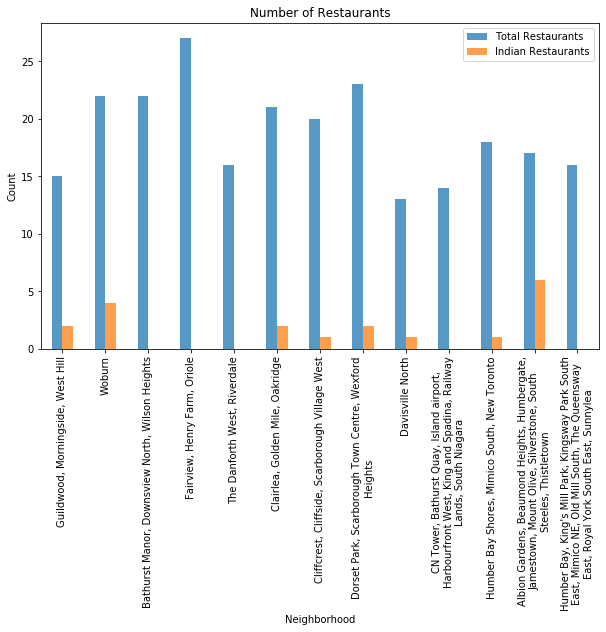

In [134]:
%matplotlib inline

ax = cluster3.plot(x='Neighborhood',y=['Total Restaurants','Indian Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants', figsize=(10,6))
ax.set_ylabel('Count')
ax.set_xticklabels(['\n'.join(wrapper.wrap(x)) for x in  cluster3['Neighborhood']])


[Text(0, 0, 'Guildwood, Morningside, West Hill'),
 Text(0, 0, 'Woburn'),
 Text(0, 0, 'Bathurst Manor, Downsview North, Wilson Heights'),
 Text(0, 0, 'Fairview, Henry Farm, Oriole'),
 Text(0, 0, 'The Danforth West, Riverdale'),
 Text(0, 0, 'Clairlea, Golden Mile, Oakridge'),
 Text(0, 0, 'Cliffcrest, Cliffside, Scarborough Village West'),
 Text(0, 0, 'Dorset Park, Scarborough Town Centre, Wexford\nHeights'),
 Text(0, 0, 'Davisville North'),
 Text(0, 0, 'CN Tower, Bathurst Quay, Island airport,\nHarbourfront West, King and Spadina, Railway\nLands, South Niagara'),
 Text(0, 0, 'Humber Bay Shores, Mimico South, New Toronto'),
 Text(0, 0, 'Albion Gardens, Beaumond Heights, Humbergate,\nJamestown, Mount Olive, Silverstone, South\nSteeles, Thistletown'),
 Text(0, 0, "Humber Bay, King's Mill Park, Kingsway Park South\nEast, Mimico NE, Old Mill South, The Queensway\nEast, Royal York South East, Sunnylea")]

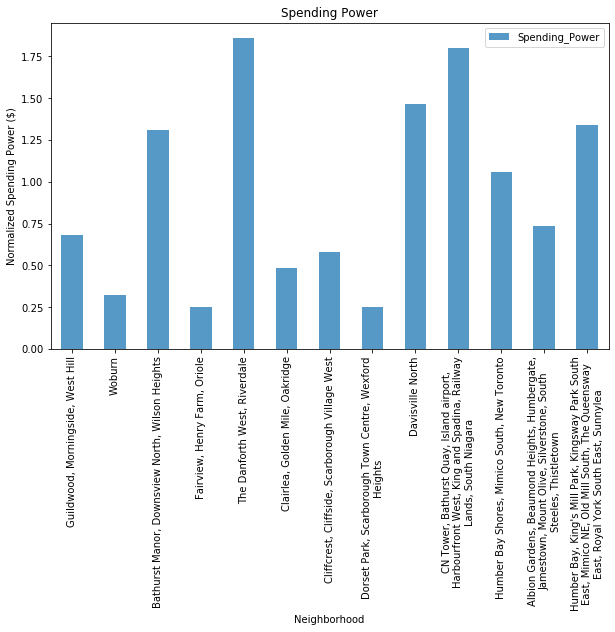

In [136]:
ax = cluster3.plot(x='Neighborhood',y=['Spending_Power'],kind='bar',alpha=0.75,title='Spending Power', figsize=(10,6))
ax.set_ylabel('Normalized Spending Power ($)')
ax.set_xticklabels(['\n'.join(wrapper.wrap(x)) for x in  cluster3['Neighborhood']])

[Text(0, 0, 'Guildwood, Morningside, West Hill'),
 Text(0, 0, 'Woburn'),
 Text(0, 0, 'Bathurst Manor, Downsview North, Wilson Heights'),
 Text(0, 0, 'Fairview, Henry Farm, Oriole'),
 Text(0, 0, 'The Danforth West, Riverdale'),
 Text(0, 0, 'Clairlea, Golden Mile, Oakridge'),
 Text(0, 0, 'Cliffcrest, Cliffside, Scarborough Village West'),
 Text(0, 0, 'Dorset Park, Scarborough Town Centre, Wexford\nHeights'),
 Text(0, 0, 'Davisville North'),
 Text(0, 0, 'CN Tower, Bathurst Quay, Island airport,\nHarbourfront West, King and Spadina, Railway\nLands, South Niagara'),
 Text(0, 0, 'Humber Bay Shores, Mimico South, New Toronto'),
 Text(0, 0, 'Albion Gardens, Beaumond Heights, Humbergate,\nJamestown, Mount Olive, Silverstone, South\nSteeles, Thistletown'),
 Text(0, 0, "Humber Bay, King's Mill Park, Kingsway Park South\nEast, Mimico NE, Old Mill South, The Queensway\nEast, Royal York South East, Sunnylea")]

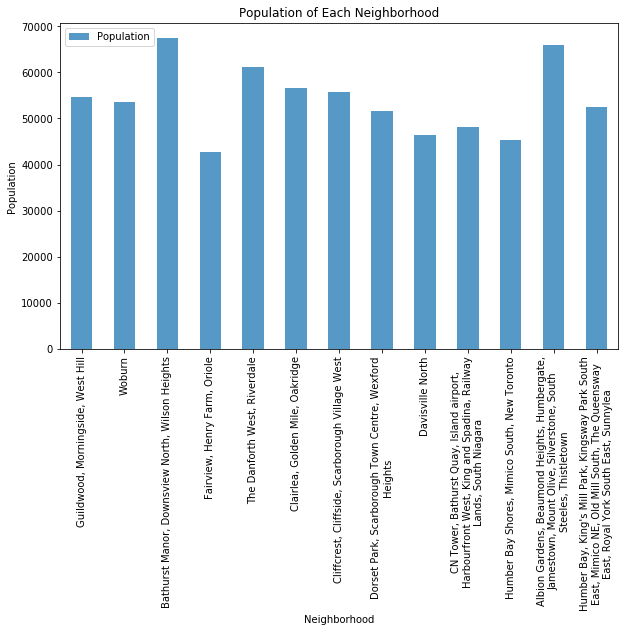

In [137]:
ax = cluster3.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood',figsize=(10, 6))
ax.set_ylabel('Population')
ax.set_xticklabels(['\n'.join(wrapper.wrap(x)) for x in  cluster3['Neighborhood']])

[Text(0, 0, 'Guildwood, Morningside, West Hill'),
 Text(0, 0, 'Woburn'),
 Text(0, 0, 'Bathurst Manor, Downsview North, Wilson Heights'),
 Text(0, 0, 'Fairview, Henry Farm, Oriole'),
 Text(0, 0, 'The Danforth West, Riverdale'),
 Text(0, 0, 'Clairlea, Golden Mile, Oakridge'),
 Text(0, 0, 'Cliffcrest, Cliffside, Scarborough Village West'),
 Text(0, 0, 'Dorset Park, Scarborough Town Centre, Wexford\nHeights'),
 Text(0, 0, 'Davisville North'),
 Text(0, 0, 'CN Tower, Bathurst Quay, Island airport,\nHarbourfront West, King and Spadina, Railway\nLands, South Niagara'),
 Text(0, 0, 'Humber Bay Shores, Mimico South, New Toronto'),
 Text(0, 0, 'Albion Gardens, Beaumond Heights, Humbergate,\nJamestown, Mount Olive, Silverstone, South\nSteeles, Thistletown'),
 Text(0, 0, "Humber Bay, King's Mill Park, Kingsway Park South\nEast, Mimico NE, Old Mill South, The Queensway\nEast, Royal York South East, Sunnylea")]

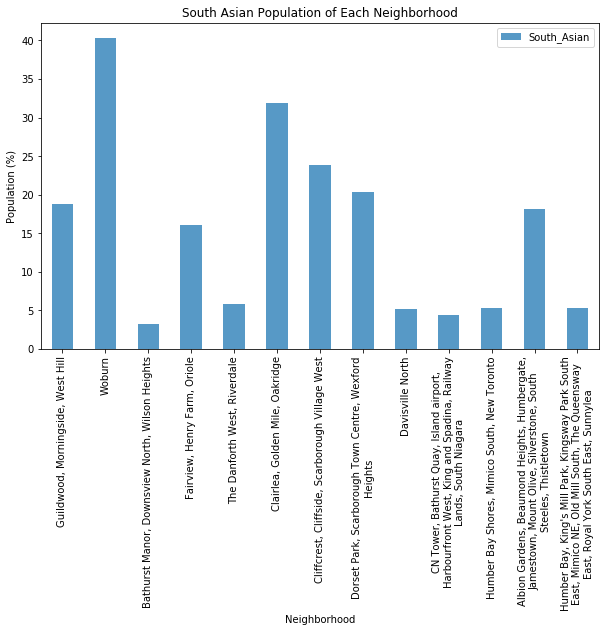

In [138]:
ax = cluster3.plot(x='Neighborhood',y=['South_Asian'],kind='bar',alpha=0.75,title='South Asian Population of Each Neighborhood', figsize=(10, 6))
ax.set_ylabel('Population (%)')
ax.set_xticklabels(['\n'.join(wrapper.wrap(x)) for x in  cluster3['Neighborhood']])

In [132]:
# create map

# (width=1000, height=500)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(k)
# ys = [i + x + (i*x)**2 for i in range(k)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'blue', 'green', 'yellow', 'orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster3['Latitude'], cluster3['Longitude'], cluster3['Neighborhood'], cluster3['Cluster Labels'],cluster3['Total Restaurants'],cluster3['Indian Restaurants'],cluster3['Spending_Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [150]:
cluster3[['Neighborhood', 'South_Asian', 'Spending_Power', 'Indian Restaurants']].sort_values('Indian Restaurants', ascending=True)

,Neighborhood,South_Asian,Spending_Power,Indian Restaurants
23,"Bathurst Manor, Downsview North, Wilson Heights",3.28,1.311792,0
28,"Fairview, Henry Farm, Oriole",16.04,0.250744,0
36,"The Danforth West, Riverdale",5.88,1.857595,0
77,"CN Tower, Bathurst Quay, Island airport, Harbo...",4.46,1.797922,0
86,"Humber Bay, King's Mill Park, Kingsway Park So...",5.34,1.336923,0
44,"Cliffcrest, Cliffside, Scarborough Village West",23.88,0.578090,1
57,Davisville North,5.22,1.462559,1
78,"Humber Bay Shores, Mimico South, New Toronto",5.32,1.060635,1
15,"Guildwood, Morningside, West Hill",18.74,0.680704,2
39,"Clairlea, Golden Mile, Oakridge",31.84,0.482497,2
